## **🔧 1. Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 📥 2. Loading the Dataset

In [ ]:
file_path = '/content/weatherAUS.csv'

try:
    dataset = pd.read_csv(file_path)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    print("Attempting to skip problematic lines...")
    lines = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                fields = line.strip().split(',')
                if len(fields) == 23: # Only include lines with correct number of fields
                    lines.append(fields)
            except Exception as ex:
                print(f"Skipping problematic line: {line}")
    dataset = pd.DataFrame(lines[1:], columns=lines[0])

# 🧹 3. Data Cleaning

In [ ]:
# Selecting features and target
X = dataset.iloc[:, [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].values
Y = dataset.iloc[:, -1].values.reshape(-1, 1)

# Handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

print(X.shape, Y.shape)

(31977, 19) (31977, 1)


# 🔤 4. Encoding Categorical Data

In [ ]:
label_encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    label_encoders.append(le)

Y_encoder = LabelEncoder()
Y = Y_encoder.fit_transform(Y.ravel())

print(np.unique(Y))

[0 1]


# ⚖️ 5. Feature Scaling

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X[:5], 2))  # Sample first 5 rows after scaling

[[-1.57  0.03 -0.18 -0.24  1.31  0.63  1.06  1.5   0.96  0.88 -0.   -1.51
  -1.78 -1.48  1.96 -0.67 -0.16 -0.1  -0.53]
 [-1.57 -1.01  0.18 -0.37  1.53  0.63 -0.51  1.72 -0.89  0.67 -1.51 -1.36
  -1.29 -1.36 -0.64 -0.67 -0.11  0.33 -0.53]
 [-1.57 -0.06  0.28 -0.37  1.75  0.78  1.06  1.72  0.75  1.09 -1.85 -1.11
  -1.8  -1.2  -0.64 -0.29  0.61  0.14 -0.53]
 [-1.57 -0.7   0.67 -0.37 -0.66 -0.99  0.16 -1.65 -0.07 -0.79 -1.46 -1.8
  -0.1  -0.49 -0.64 -0.67  0.06  0.71 -0.53]
 [-1.57  0.74  1.39 -0.16  1.31  0.34 -1.63 -0.07 -0.48  0.46  0.61 -0.96
  -1.25 -1.66  1.58  2.03  0.01  1.26 -0.53]]


# 🧪 6. Splitting the Dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(25581, 19) (6396, 19)


# 📈 7. Training Models

In [ ]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
y_pred_linear = linear_reg.predict(X_test)


print(y_pred_linear)

[ 0.20684825 -0.00904462  0.25310664 ...  0.21608588  0.15404457
  0.29068009]


In [ ]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
y_pred_lasso = lasso_reg.predict(X_test)


print(y_pred_lasso)

[0.25136971 0.12392959 0.19675252 ... 0.21495825 0.23771542 0.28322975]


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


print(y_pred_rf)

[0 0 0 ... 0 0 0]


# 📊 8. Prediction Comparison Table

In [ ]:
# Decode predictions back to original labels
Y_test_decoded = Y_encoder.inverse_transform(Y_test)
y_pred_rf_decoded = Y_encoder.inverse_transform(y_pred_rf)

comparison_df = pd.DataFrame({
    'Rain on Tomorrow': Y_test_decoded,
    'Prediction of Rain': y_pred_rf_decoded
})
print(comparison_df)

     Rain on Tomorrow Prediction of Rain
0                  No                 No
1                  No                 No
2                  No                 No
3                  No                 No
4                  No                 No
...               ...                ...
6391               No                 No
6392              Yes                 No
6393               No                 No
6394               No                 No
6395               No                 No

[6396 rows x 2 columns]


# 📏 9. Accuracy Calculation

In [ ]:
# Convert 'Yes'/'No' to numeric for accuracy
Y_test_numeric = (Y_test_decoded == 'Yes').astype(int)
y_pred_rf_numeric = (y_pred_rf_decoded == 'Yes').astype(int)

accuracy_linear = accuracy_score(Y_test_numeric, y_pred_linear.round())
accuracy_lasso = accuracy_score(Y_test_numeric, y_pred_lasso.round())
accuracy_rf = accuracy_score(Y_test_numeric, y_pred_rf_numeric)

print("Accuracy for Linear Regression:", accuracy_linear)
print("Accuracy for Lasso Regression:", accuracy_lasso)
print("Accuracy for Random Forest:", accuracy_rf)

Accuracy for Linear Regression: 0.8408380237648531
Accuracy for Lasso Regression: 0.7793933708567855
Accuracy for Random Forest: 0.8527204502814258


# 📉 10. Visualization


In [ ]:
# Create dataframe for plotting
df_plot = pd.DataFrame({
    'Actual': Y_test_numeric,
    'Predicted': y_pred_rf_numeric
})

fig = px.scatter(
    df_plot,
    x='Actual',
    y='Predicted',
    title='Actual vs. Predicted Rainfall (Interactive)',
    labels={'Actual': 'Actual Rainfall (Yes=1, No=0)', 'Predicted': 'Predicted Rainfall (Yes=1, No=0)'},
    opacity=0.6
)

# Add diagonal reference line
fig.add_shape(
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="red", dash="dash")
)

fig.show()

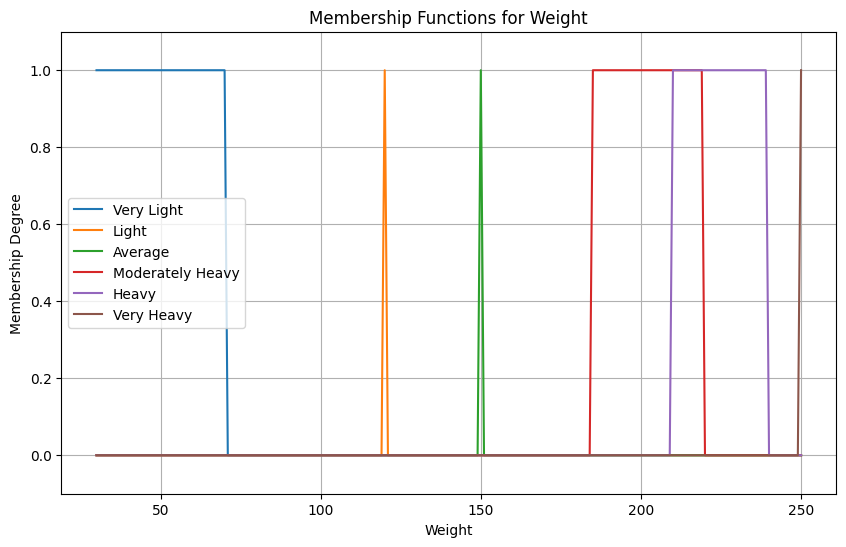

In [ ]:
# Fuzzy Logic Membership Functions

# Define universal set
U = np.arange(30, 251, 1)

# Define membership functions for weight
def very_light(x):
    return np.piecewise(x,
                       [x <= 70, (70 < x) & (x < 250), x >= 250],
                       [1, lambda x: (250 - x) / 180, 0])

def light(x):
    return np.piecewise(x,
                       [x <= 70, (70 < x) & (x < 120), (120 <= x) & (x <= 250)],
                       [0, lambda x: np.minimum(1, (x - 70) / 50), lambda x: np.maximum(0, (250 - x) / 130)])

def average(x):
    return np.piecewise(x,
                       [x <= 100, (100 < x) & (x < 200), x >= 200],
                       [0, lambda x: np.minimum(np.minimum((x - 100) / 50, 1), (200 - x) / 50), 0])

def moderately_heavy(x):
    return np.piecewise(x,
                       [x <= 150, (150 < x) & (x < 220), x >= 220],
                       [0, lambda x: np.minimum(1, (x - 150) / 35), 0])

def heavy(x):
    return np.piecewise(x,
                       [x <= 180, (180 < x) & (x < 240), x >= 240],
                       [0, lambda x: np.minimum(1, (x - 180) / 30), 0])

def very_heavy(x):
    return np.piecewise(x,
                       [x <= 200, (200 < x) & (x < 250), x >= 250],
                       [0, lambda x: (x - 200) / 50, 1])

# Plot membership functions
plt.figure(figsize=(10, 6))
plt.plot(U, very_light(U), label='Very Light')
plt.plot(U, light(U), label='Light')
plt.plot(U, average(U), label='Average')
plt.plot(U, moderately_heavy(U), label='Moderately Heavy')
plt.plot(U, heavy(U), label='Heavy')
plt.plot(U, very_heavy(U), label='Very Heavy')
plt.title('Membership Functions for Weight')
plt.xlabel('Weight')
plt.ylabel('Membership Degree')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# 🔢 11. CNN Model: Import Libraries & Prepare Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape input for Conv1D: [samples, timesteps, channels]
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode target labels for CNN
Y_train_cnn = to_categorical(Y_train)
Y_test_cnn = to_categorical(Y_test)

print(X_train_cnn.shape, Y_train_cnn.shape)

(25581, 19, 1) (25581, 2)


# 🧠 12. Define and Compile the CNN Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 17, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,218 (129.76 KB)

 Trainable params: 33,218 (129.76 KB)

 Non-trainable params: 0 (0.00 B)

None


# 🏋️ 13. Train the CNN Model

In [ ]:
history = model.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8148 - loss: 0.4239 - val_accuracy: 0.8470 - val_loss: 0.3590
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8331 - loss: 0.3829 - val_accuracy: 0.8560 - val_loss: 0.3509
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8401 - loss: 0.3688 - val_accuracy: 0.8550 - val_loss: 0.3454
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8412 - loss: 0.3645 - val_accuracy: 0.8562 - val_loss: 0.3439
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8450 - loss: 0.3665 - val_accuracy: 0.8552 - val_loss: 0.3429
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8489 - loss: 0.3549 - val_accuracy: 0.8562 - val_loss: 0.3441
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.3585 - val_accuracy: 0.8603 - val_loss: 0.3387
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8513 - loss: 0.3507 - val_accuracy: 0.

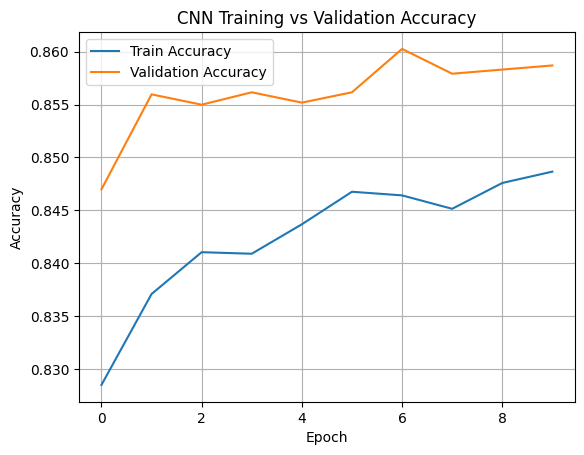

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.grid(True)
plt.show()


# 📊 14. Evaluate the CNN Model

In [ ]:
loss, accuracy = model.evaluate(X_test_cnn, Y_test_cnn)
print("CNN Accuracy:", accuracy)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3377
CNN Accuracy: 0.8558474183082581


In [ ]:
comparison_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Random Forest', 'CNN'],
    'Accuracy': [accuracy_linear, accuracy_lasso, accuracy_rf, accuracy]
})

print(comparison_summary)


               Model  Accuracy
0  Linear Regression  0.840838
1   Lasso Regression  0.779393
2      Random Forest  0.852720
3                CNN  0.855847


##  🔮15. CNN Probabilities

In [ ]:
# Get prediction probabilities
y_pred_probs = model.predict(X_test_cnn)

# Extract rain probability (class 1)
rain_probs = y_pred_probs[:, 1]

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## 🧠16. Fuzzy Membership Functions

In [ ]:
def low_confidence(x):
    return np.piecewise(x, [x <= 0.3, (x > 0.3) & (x < 0.5), x >= 0.5],
                        [1, lambda x: (0.5 - x) / 0.2, 0])

def medium_confidence(x):
    return np.piecewise(x, [x <= 0.3, (x > 0.3) & (x < 0.7), x >= 0.7],
                        [0, lambda x: np.minimum((x - 0.3) / 0.4, (0.7 - x) / 0.4), 0])

def high_confidence(x):
    return np.piecewise(x,
                        [x <= 0.5, (x > 0.5) & (x < 0.8), x >= 0.8],
                        [0, lambda x: (x - 0.5) / 0.3, 1])


##⚖️17. Fuzzy Rules

In [ ]:
fuzzy_predictions = []

for prob in rain_probs:
    low = low_confidence(prob)
    medium = medium_confidence(prob)
    high = high_confidence(prob)

    # Modified decision rule with stronger bias towards high confidence
    if high > 0.6:
        fuzzy_predictions.append(1)  # Strong confidence for "Yes"
    elif low > 0.6:
        fuzzy_predictions.append(0)  # Strong confidence for "No"
    elif medium > high and medium > low:
        # If medium confidence is highest but probability is close to threshold,
        # apply a more conservative approach
        fuzzy_predictions.append(1 if prob > 0.55 else 0)
    else:
        # Default case - higher threshold than standard 0.5
        fuzzy_predictions.append(1 if prob > 0.52 else 0)

# 📊18. Evaluate Fuzzy Classifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Use numeric Y_test (already converted to 0/1)
fuzzy_accuracy = accuracy_score(Y_test_numeric, fuzzy_predictions)
print("Fuzzy CNN Classifier Accuracy:", fuzzy_accuracy)

# Optional: confusion matrix
cm = confusion_matrix(Y_test_numeric, fuzzy_predictions)
print("Confusion Matrix:\n", cm)


Fuzzy CNN Classifier Accuracy: 0.8560037523452158
Confusion Matrix:
 [[4783  202]
 [ 719  692]]


# 🎨19. Visualize Membership

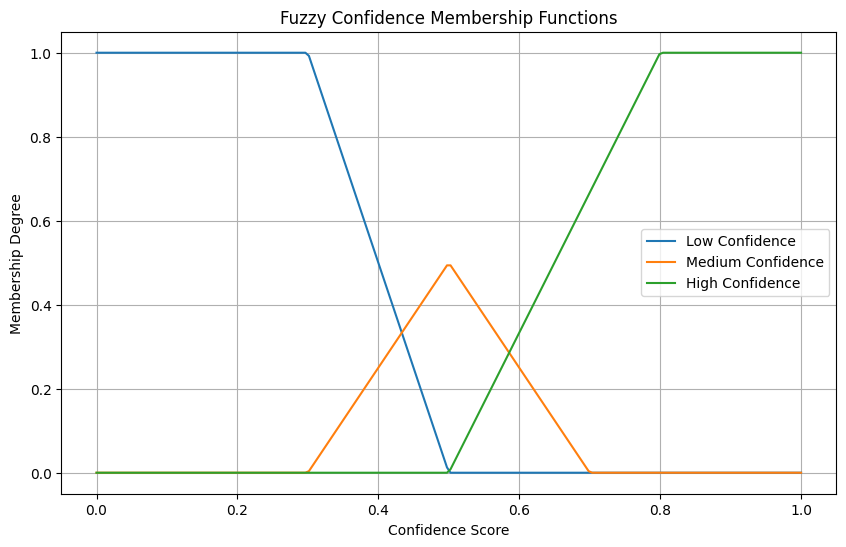

In [ ]:
x_vals = np.linspace(0, 1, 200)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, low_confidence(x_vals), label='Low Confidence')
plt.plot(x_vals, medium_confidence(x_vals), label='Medium Confidence')
plt.plot(x_vals, high_confidence(x_vals), label='High Confidence')
plt.title('Fuzzy Confidence Membership Functions')
plt.xlabel('Confidence Score')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

##⚖️20. Comparison Table

In [ ]:
# Create the initial comparison summary
comparison_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Random Forest', 'CNN'],
    'Accuracy': [accuracy_linear, accuracy_lasso, accuracy_rf, accuracy]
})

# Add the fuzzy CNN model (only once)
new_idx = len(comparison_summary)
comparison_summary.loc[new_idx] = ['CNN + Fuzzy Logic', fuzzy_accuracy]

# Print the final summary (just once)
print(comparison_summary)

               Model  Accuracy
0  Linear Regression  0.840838
1   Lasso Regression  0.779393
2      Random Forest  0.852720
3                CNN  0.855847
4  CNN + Fuzzy Logic  0.856004
